#Environment Setup

In [2]:
# Python code for environment setup in Google Colab

# Install necessary libraries
!pip install pandas numpy ccxt yfinance tensorflow transformers matplotlib seaborn

# Import all necessary packages
import pandas as pd
import numpy as np
import ccxt
import yfinance as yf
import tensorflow as tf
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Check if GPU/TPU is available for model training
gpu_available = tf.config.list_physical_devices('GPU')
tpu_available = tf.config.list_physical_devices('TPU')

# Output the availability of GPU and TPU
gpu_available, tpu_available

([], [])

In [3]:
# Install necessary libraries
!pip install pandas numpy ccxt yfinance tensorflow transformers matplotlib seaborn

# Import all necessary packages
import pandas as pd
import numpy as np
import ccxt
import yfinance as yf
import tensorflow as tf
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Check if GPU/TPU is available for model training
gpu_available = tf.config.list_physical_devices('GPU')
tpu_available = tf.config.list_physical_devices('TPU')

# Output the availability of GPU and TPU
print("GPU Available: ", gpu_available)
print("TPU Available: ", tpu_available)

GPU Available:  []
TPU Available:  []


#Data Collection

In [4]:
# Cryptocurrency Data Collection using CCXT
import ccxt
import pandas as pd
import time
# Update the exchange to Kraken
exchange = ccxt.kraken()

# Define a function to fetch OHLCV data for a specific cryptocurrency
def fetch_crypto_data(symbol, timeframe='1d', since=None, limit=1000):
    """Fetch OHLCV data for a given symbol and timeframe."""
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since, limit=limit)
    # Create a DataFrame with appropriate column names
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')  # Convert timestamp to readable date
    return df

# Fetch daily OHLCV data for Bitcoin and Ethereum from Kraken
btc_data = fetch_crypto_data('BTC/USD', '1d')
eth_data = fetch_crypto_data('ETH/USD', '1d')

# Display the first few rows of the data
print("Bitcoin Data from Kraken:")
print(btc_data.head())

Bitcoin Data from Kraken:
   timestamp     open     high      low    close       volume
0 2022-10-16  19070.6  19420.7  19066.8  19261.7  1539.080774
1 2022-10-17  19261.8  19667.6  19160.0  19550.9  3302.593575
2 2022-10-18  19549.8  19696.9  19110.0  19330.6  3216.432110
3 2022-10-19  19329.1  19355.7  19071.2  19124.1  2169.670204
4 2022-10-20  19124.1  19344.3  18900.3  19045.2  2863.481191


In [5]:
print("\nEthereum Data from Kraken:")
print(eth_data.head())


Ethereum Data from Kraken:
   timestamp     open     high      low    close        volume
0 2022-10-16  1274.97  1315.22  1274.69  1306.40  20119.775149
1 2022-10-17  1306.46  1338.00  1295.14  1331.55  27868.725646
2 2022-10-18  1331.55  1341.11  1287.75  1309.98  27524.258404
3 2022-10-19  1309.99  1313.57  1280.19  1284.61  17420.324436
4 2022-10-20  1284.60  1310.00  1270.57  1282.55  22597.535789


In [6]:
# Stock Data Collection using yfinance
import yfinance as yf

# Define a function to fetch OHLCV data for a specific stock
def fetch_stock_data(ticker, start_date='2010-01-01', end_date=None):
    """Fetch OHLCV data for a given stock ticker."""
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    # Ensure the data format matches cryptocurrency data
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']].reset_index()
    df.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
    return df

# Fetch OHLCV data for Apple and Tesla
apple_data = fetch_stock_data('AAPL', start_date='2020-01-01')
tesla_data = fetch_stock_data('TSLA', start_date='2020-01-01')

# Display the first few rows of the data
print("\nApple Stock Data:")
print(apple_data.head())


Apple Stock Data:
                  timestamp       open       high        low      close  \
0 2020-01-02 00:00:00-05:00  71.878856  72.936758  71.624090  72.876099   
1 2020-01-03 00:00:00-05:00  72.099649  72.931893  71.941936  72.167587   
2 2020-01-06 00:00:00-05:00  71.284400  72.781468  71.032056  72.742645   
3 2020-01-07 00:00:00-05:00  72.752363  73.009558  72.179742  72.400543   
4 2020-01-08 00:00:00-05:00  72.102091  73.868490  72.102091  73.565193   

      volume  
0  135480400  
1  146322800  
2  118387200  
3  108872000  
4  132079200  


In [7]:
print("\nTesla Stock Data:")
print(tesla_data.head())


Tesla Stock Data:
                  timestamp       open       high        low      close  \
0 2020-01-02 00:00:00-05:00  28.299999  28.713333  28.114000  28.684000   
1 2020-01-03 00:00:00-05:00  29.366667  30.266666  29.128000  29.534000   
2 2020-01-06 00:00:00-05:00  29.364668  30.104000  29.333332  30.102667   
3 2020-01-07 00:00:00-05:00  30.760000  31.441999  30.224001  31.270666   
4 2020-01-08 00:00:00-05:00  31.580000  33.232666  31.215334  32.809334   

      volume  
0  142981500  
1  266677500  
2  151995000  
3  268231500  
4  467164500  


In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Example data: Use btc_data, eth_data, apple_data, and tesla_data from the previous steps

# Handling Missing Data: Fill or Interpolate
def handle_missing_data(df):
    """Fill or interpolate missing data."""
    # You can choose either to fill missing values or interpolate
    df = df.fillna(method='ffill').fillna(method='bfill')  # Forward fill and backward fill
    # Alternatively, use interpolation: df.interpolate()
    return df

# Apply missing data handling to both cryptocurrency and stock data
btc_data = handle_missing_data(btc_data)
eth_data = handle_missing_data(eth_data)
apple_data = handle_missing_data(apple_data)
tesla_data = handle_missing_data(tesla_data)

# Normalization/Scaling
# You can use either MinMaxScaler or StandardScaler based on your needs
scaler = MinMaxScaler()  # Or use StandardScaler()

def scale_data(df):
    """Normalize or standardize the data using MinMaxScaler or StandardScaler."""
    columns = ['open', 'high', 'low', 'close', 'volume']
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Apply scaling to the data
btc_data_scaled = scale_data(btc_data.copy())
eth_data_scaled = scale_data(eth_data.copy())
apple_data_scaled = scale_data(apple_data.copy())
tesla_data_scaled = scale_data(tesla_data.copy())

# Data Slicing: Train, Validation, Test Split
def split_data(df, train_size=0.7, val_size=0.15):
    """Split data into train, validation, and test sets."""
    train_end = int(len(df) * train_size)
    val_end = int(len(df) * (train_size + val_size))

    train_data = df[:train_end]
    val_data = df[train_end:val_end]
    test_data = df[val_end:]

    return train_data, val_data, test_data

# Split the scaled data
btc_train, btc_val, btc_test = split_data(btc_data_scaled)
eth_train, eth_val, eth_test = split_data(eth_data_scaled)
apple_train, apple_val, apple_test = split_data(apple_data_scaled)
tesla_train, tesla_val, tesla_test = split_data(tesla_data_scaled)

# Feature Engineering: Adding Moving Averages and Volatility
def add_features(df):
    """Add technical indicators like moving averages and volatility."""
    df['MA_10'] = df['close'].rolling(window=10).mean()  # 10-day moving average
    df['MA_30'] = df['close'].rolling(window=30).mean()  # 30-day moving average
    df['Volatility'] = df['close'].rolling(window=10).std()  # 10-day rolling standard deviation (volatility)
    return df

# Apply feature engineering to each dataset
btc_train = add_features(btc_train)
eth_train = add_features(eth_train)
apple_train = add_features(apple_train)
tesla_train = add_features(tesla_train)

# Drop rows with NaN values that were introduced by moving averages
btc_train = btc_train.dropna()
eth_train = eth_train.dropna()
apple_train = apple_train.dropna()
tesla_train = tesla_train.dropna()

# Display the first few rows of the processed training data
print("\nProcessed Bitcoin Training Data:")
print(btc_train.head())


Processed Bitcoin Training Data:
    timestamp      open      high       low     close    volume     MA_10  \
29 2022-11-14  0.009599  0.015178  0.005903  0.014408  0.317327  0.041615   
30 2022-11-15  0.014410  0.014286  0.018681  0.019492  0.223435  0.033900   
31 2022-11-16  0.019496  0.012295  0.016101  0.015770  0.198144  0.026492   
32 2022-11-17  0.015676  0.008088  0.016806  0.016079  0.148780  0.019661   
33 2022-11-18  0.016143  0.012223  0.019158  0.016098  0.154704  0.016412   

       MA_30  Volatility  
29  0.062764    0.035981  
30  0.061378    0.030766  
31  0.059699    0.023961  
32  0.058159    0.012724  
33  0.056739    0.007658  


<ipython-input-8-f4cee311764f>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')  # Forward fill and backward fill
<ipython-input-8-f4cee311764f>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_10'] = df['close'].rolling(window=10).mean()  # 10-day moving average
<ipython-input-8-f4cee311764f>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_30'] 

In [9]:

print("\nProcessed Ethereum Training Data:")
print(eth_train.head())



Processed Ethereum Training Data:
    timestamp      open      high       low     close    volume     MA_10  \
29 2022-11-14  0.040626  0.050193  0.035215  0.048180  0.279695  0.084557   
30 2022-11-15  0.047966  0.050769  0.056589  0.051639  0.232162  0.071881   
31 2022-11-16  0.051277  0.042736  0.039752  0.039421  0.237426  0.059984   
32 2022-11-17  0.039122  0.029163  0.039037  0.034102  0.128531  0.047570   
33 2022-11-18  0.033727  0.031276  0.044845  0.038211  0.082123  0.043427   

       MA_30  Volatility  
29  0.107107    0.059546  
30  0.106490    0.050093  
31  0.105184    0.040468  
32  0.103943    0.021632  
33  0.103124    0.018557  


In [10]:

print("\nProcessed Apple Stock Training Data:")
print(apple_train.head())



Processed Apple Stock Training Data:
                   timestamp      open      high       low     close  \
29 2020-02-13 00:00:00-05:00  0.129335  0.131032  0.148712  0.135810   
30 2020-02-14 00:00:00-05:00  0.130075  0.130710  0.148041  0.135918   
31 2020-02-18 00:00:00-05:00  0.117452  0.122356  0.136975  0.127878   
32 2020-02-19 00:00:00-05:00  0.123696  0.128820  0.144214  0.134121   
33 2020-02-20 00:00:00-05:00  0.127235  0.128927  0.141810  0.129634   

      volume     MA_10     MA_30  Volatility  
29  0.175667  0.128309  0.121082    0.008652  
30  0.139306  0.130494  0.122223    0.007310  
31  0.319243  0.131990  0.123226    0.004169  
32  0.173770  0.132737  0.124331    0.003756  
33  0.190124  0.132684  0.125350    0.003799  


In [ ]:
print("\nProcessed Tesla Stock Training Data:")
print(tesla_train.head())

In [ ]:
# Install necessary libraries
!pip install yfinance transformers torch pandas

import yfinance as yf
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
import pandas as pd

# Step 1: Fetch OHLCV data for Bitcoin using yfinance
def fetch_crypto_data(symbol='BTC-USD', period='1y'):
    """
    Fetch OHLCV (Open, High, Low, Close, Volume) data for a cryptocurrency.
    By default, it fetches 1 year of daily Bitcoin data.
    """
    data = yf.download(symbol, period=period, interval='1d')
    # Keeping only the required OHLCV columns
    return data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Fetch Bitcoin data for the last 1 year
btc_data = fetch_crypto_data()
print(btc_data.head())

# Step 2: Convert OHLCV Data to Sequences
def convert_to_sequence(df):
    """
    Convert OHLCV data into a sequence suitable for GPT-2.
    Each row is treated as a 'sentence' with OHLCV values as 'tokens'.
    """
    sequences = []
    for index, row in df.iterrows():
        # Create a string sequence from OHLCV data
        sequence = f"{row['Open']} {row['High']} {row['Low']} {row['Close']} {row['Volume']}"
        sequences.append(sequence)
    return sequences

# Convert Bitcoin OHLCV data into sequences
btc_sequences = convert_to_sequence(btc_data)
print("\nSample Sequences:")
print(btc_sequences[:3])  # Print the first 3 sequences

# Step 3: Tokenize the Sequences using GPT-2 Tokenizer
# Initialize the GPT-2 tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# GPT-2 doesn't have a padding token by default, so we set the EOS token as the pad token
tokenizer.pad_token = tokenizer.eos_token

# Tokenize the sequences
def tokenize_sequences(sequences, tokenizer, max_length=512):
    """Tokenize sequences for the GPT-2 model."""
    return tokenizer(sequences, padding=True, truncation=True, max_length=max_length, return_tensors='pt')

# Tokenize the Bitcoin sequences
btc_tokens = tokenize_sequences(btc_sequences, tokenizer)
print("\nTokenized Inputs:")
print(btc_tokens['input_ids'][:3])  # Print the first 3 tokenized inputs

# Step 4: Fine-tune GPT-2 on Bitcoin OHLCV Data
def fine_tune_gpt(model, tokenized_inputs, epochs=3, learning_rate=1e-4):
    """Fine-tune GPT-2 on tokenized time-series data."""
    model.train()  # Set model to training mode
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    # Convert to PyTorch tensors
    input_ids = tokenized_inputs['input_ids']
    attention_mask = tokenized_inputs['attention_mask']

    for epoch in range(epochs):
        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=input_ids)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Initialize the GPT-2 model
model = GPT2LMHeadModel.from_pretrained(model_name)
model.resize_token_embeddings(len(tokenizer))  # Adjust token embeddings

# Fine-tune the GPT-2 model on the Bitcoin data
fine_tune_gpt(model, btc_tokens)

[*********************100%***********************]  1 of 1 completed


                    Open          High           Low         Close  \
Date                                                                 
2023-10-04  27429.074219  27826.658203  27248.105469  27799.394531   
2023-10-05  27798.646484  28091.861328  27375.601562  27415.912109   
2023-10-06  27412.123047  28252.537109  27215.552734  27946.597656   
2023-10-07  27946.781250  28028.091797  27870.423828  27968.839844   
2023-10-08  27971.677734  28102.169922  27740.662109  27935.089844   

                 Volume  
Date                     
2023-10-04  11143355314  
2023-10-05  11877253670  
2023-10-06  13492391599  
2023-10-07   6553044316  
2023-10-08   7916875290  

Sample Sequences:
['27429.07421875 27826.658203125 27248.10546875 27799.39453125 11143355314.0', '27798.646484375 28091.861328125 27375.6015625 27415.912109375 11877253670.0', '27412.123046875 28252.537109375 27215.552734375 27946.59765625 13492391599.0']


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



Tokenized Inputs:
tensor([[ 1983, 11785,    13,  2998,  3682,  1507,  2425, 39174,  2075,    13,
         38431, 22416, 11623,  2681, 23045,    13,   940,  4051,  3104,  2425,
         38703,  2079,    13,  2670, 36625, 11623, 13374, 42117,  2816, 33638,
            13,    15, 50256, 50256, 50256, 50256, 50256],
        [ 1983, 43240,    13,  2414, 34287,  3559,  2425, 21355,  6420,    13,
          4521,  1485,  2078, 11623,  2681, 22318,    13, 41706,  3980,  1495,
          2681, 35038,    13,    24,  1065,   940,  6052,  2425, 19035,  3324,
          1495,  2623,  2154,    13,    15, 50256, 50256],
        [28857,  1065,    13,  1065, 21288,  3104,  2425,  2579, 22800,    13,
         46096,   940,  6052,  2425,  2681, 23349,    13,  2816,  1983,  2682,
         22318, 39466,  3510,    13,  3270, 29143, 26704,  1511,  2920, 23516,
          1314,  2079,    13,    15, 50256, 50256, 50256]])


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


[*********************100%***********************]  1 of 1 completed


                    Open          High           Low         Close  \
Date                                                                 
2023-10-04  27429.074219  27826.658203  27248.105469  27799.394531   
2023-10-05  27798.646484  28091.861328  27375.601562  27415.912109   
2023-10-06  27412.123047  28252.537109  27215.552734  27946.597656   
2023-10-07  27946.781250  28028.091797  27870.423828  27968.839844   
2023-10-08  27971.677734  28102.169922  27740.662109  27935.089844   

                 Volume  
Date                     
2023-10-04  11143355314  
2023-10-05  11877253670  
2023-10-06  13492391599  
2023-10-07   6553044316  
2023-10-08   7916875290  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 0.2275 - val_loss: 0.0547
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0216 - val_loss: 0.0183
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.0227 - val_loss: 0.0146
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0105 - val_loss: 0.0073
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0070 - val_loss: 0.0052
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0063 - val_loss: 0.0101
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0057 - val_loss: 0.0066
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0054 - val_loss: 0.0065
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0048 - val_loss: 0.0066
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0052 - val_loss: 0.0065

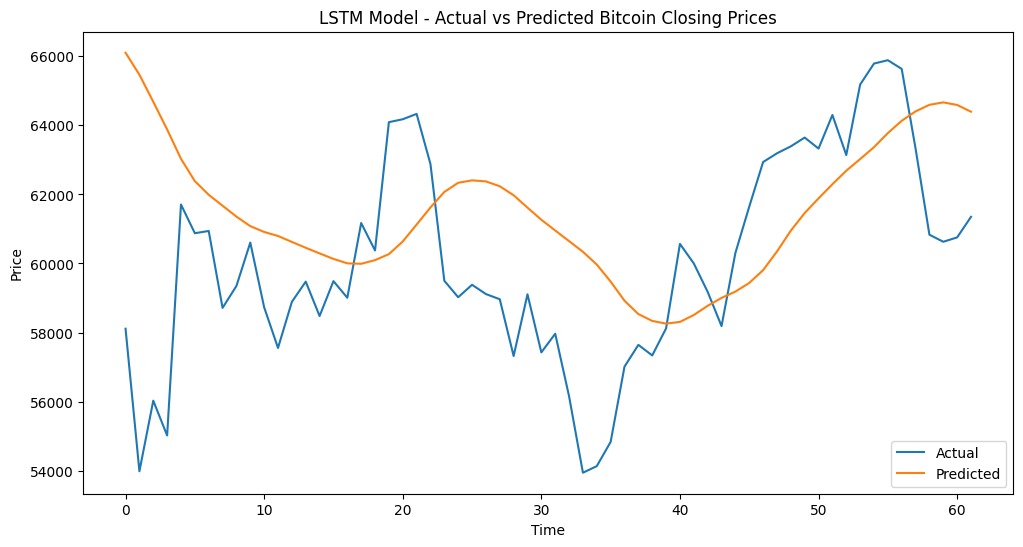

In [1]:
# Install necessary libraries
!pip install yfinance pandas numpy tensorflow sklearn

import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Fetch OHLCV data for Bitcoin using yfinance
def fetch_crypto_data(symbol='BTC-USD', period='1y'):
    """
    Fetch OHLCV (Open, High, Low, Close, Volume) data for a cryptocurrency.
    By default, it fetches 1 year of daily Bitcoin data.
    """
    data = yf.download(symbol, period=period, interval='1d')
    # Keeping only the required OHLCV columns
    return data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Fetch Bitcoin data for the last 1 year
btc_data = fetch_crypto_data()
print(btc_data.head())

# Step 2: Data Preprocessing for LSTM
# Normalize the OHLCV data for better performance with LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_data)

# Create input-output sequences for the LSTM
def create_lstm_sequences(data, time_step=60):
    """
    Create sequences of input (X) and output (y) for LSTM.
    X contains the past `time_step` days of data, y contains the next day's closing price.
    """
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i])  # Use the past `time_step` data as input
        y.append(data[i, 3])  # Use the closing price as the target (y)
    return np.array(X), np.array(y)

# Create LSTM input-output sequences (using past 60 days to predict the next day's close)
time_step = 60
X, y = create_lstm_sequences(scaled_data, time_step)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the input data to be 3D (samples, time_steps, features) as required by LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))  # 5 features (OHLCV)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))

# Step 3: Build LSTM Model
def build_lstm_model(input_shape):
    """
    Build an LSTM model using TensorFlow/Keras.
    """
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(tf.keras.layers.LSTM(50, return_sequences=False))
    model.add(tf.keras.layers.Dense(25))
    model.add(tf.keras.layers.Dense(1))  # Output layer for predicting the closing price
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build the LSTM model
lstm_model = build_lstm_model((X_train.shape[1], X_train.shape[2]))

# Step 4: Train the LSTM Model
history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Evaluate the LSTM Model
# Make predictions
train_predictions = lstm_model.predict(X_train)
test_predictions = lstm_model.predict(X_test)

# Inverse transform the predictions and actual values back to original scale
train_predictions = scaler.inverse_transform(np.concatenate((train_predictions, np.zeros((train_predictions.shape[0], 4))), axis=1))[:, 0]
test_predictions = scaler.inverse_transform(np.concatenate((test_predictions, np.zeros((test_predictions.shape[0], 4))), axis=1))[:, 0]

y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], 4))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 4))), axis=1))[:, 0]

# Calculate mean squared error
train_mse = mean_squared_error(y_train_actual, train_predictions)
test_mse = mean_squared_error(y_test_actual, test_predictions)
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Step 6: Plot the Results
# Plot actual vs predicted closing prices for the test set
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('LSTM Model - Actual vs Predicted Bitcoin Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()